In [12]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch    
import torch.nn as nn
import torch.nn.functional as F

#set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})
#darkgrid, whitegrid, dark, white, and ticks
sns.set_style("darkgrid")

In [13]:
#1d signal
x = torch.linspace(0, 10, 100)
y_sin = torch.sin(x)
y_cos = torch.cos(x)
#make two columns
y = torch.stack((y_sin, y_cos), dim=1)
#add batch dimension
y = y.unsqueeze(0)
#swap 1st and 2nd dimensions
y = y.permute(0, 2, 1)
print(y.shape)

torch.Size([1, 2, 100])


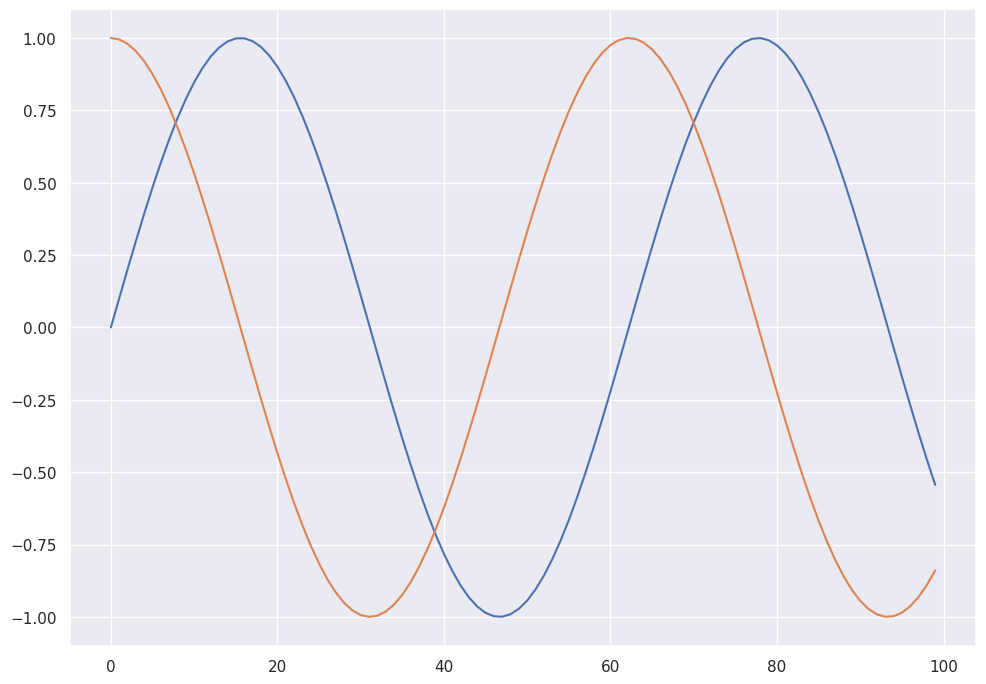

In [14]:
#plot the signal
plt.plot(y[0].permute(1, 0))

In [15]:
#1d convolution
conv = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=3, stride=1, padding='valid')

In [16]:
y_hat = conv(y)

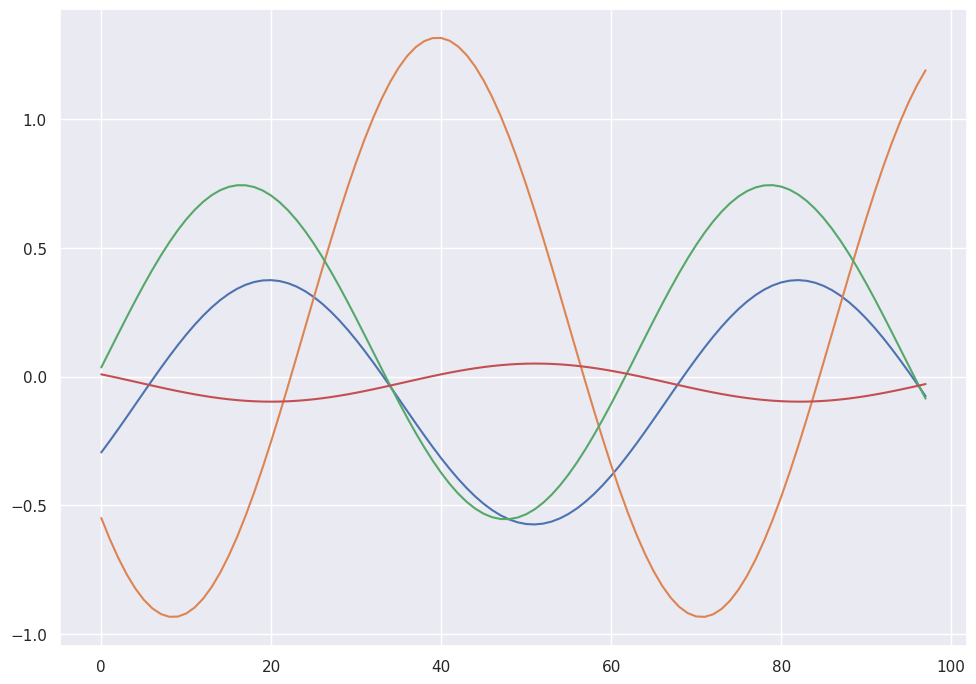

In [17]:
plt.plot(y_hat[0].permute(1, 0).detach().numpy())

In [18]:
#see the weights
print(conv.weight), print(conv.bias)

Parameter containing:
tensor([[[ 0.3003,  0.0277,  0.0622],
         [ 0.1711, -0.3283, -0.0557]],

        [[-0.3380, -0.3846, -0.2231],
         [-0.0850, -0.2497, -0.3309]],

        [[ 0.3043,  0.1385,  0.1446],
         [ 0.3414, -0.2705, -0.1782]],

        [[ 0.1598, -0.2868,  0.0728],
         [ 0.1832, -0.3930,  0.2595]]], requires_grad=True)
Parameter containing:
tensor([-0.1002,  0.1910,  0.0946, -0.0238], requires_grad=True)


(None, None)

In [19]:
y.permute(0, 2, 1)[0][:5, :], y_hat.permute(0, 2, 1)[0][:5, :]

(tensor([[0.0000, 1.0000],
         [0.1008, 0.9949],
         [0.2006, 0.9797],
         [0.2984, 0.9544],
         [0.3931, 0.9195]]),
 tensor([[-0.2950, -0.5501,  0.0353,  0.0083],
         [-0.2504, -0.6318,  0.1008,  0.0015],
         [-0.2042, -0.7051,  0.1663, -0.0057],
         [-0.1569, -0.7693,  0.2310, -0.0130],
         [-0.1091, -0.8236,  0.2943, -0.0205]], grad_fn=<SliceBackward0>))

In [20]:
conv.weight.shape, conv.bias.shape

(torch.Size([4, 2, 3]), torch.Size([4]))

In [21]:
torch.dot(conv.weight[0][0], y[0][0][0:3]) + conv.bias[0] + torch.dot(conv.weight[0][1], y[0][1][0:3])# + conv.bias[0]

tensor(-0.2950, grad_fn=<AddBackward0>)

In [22]:
y[0][0][0:3], y[0][1][0:3]

(tensor([0.0000, 0.1008, 0.2006]), tensor([1.0000, 0.9949, 0.9797]))